Define all data directories

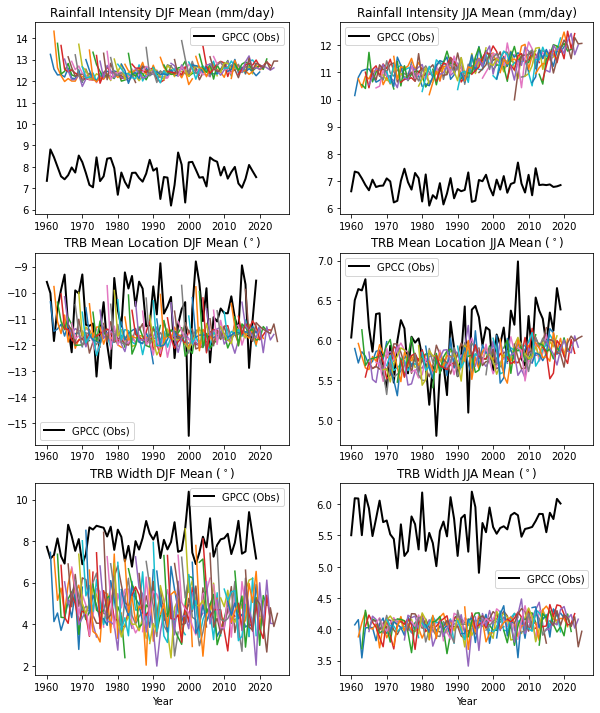

In [74]:
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt


dcpp_trbindices_directory = '/gws/pw/j05/cop26_hackathons/bristol/project02/data/DCPP/TRBindices'
gpcc_trbindices_directory = '/gws/pw/j05/cop26_hackathons/bristol/project02/data/obs/TRBindices'
model = 'CanESM5'

gpcc_obs = xr.open_dataset(gpcc_trbindices_directory+'/pr_1m_zonAvgNikulin_GPCC_1891-2019_05.nc')

model_filelist = glob.glob(dcpp_trbindices_directory+'/'+model+'/*.nc')
model_filelist.sort()
# print(model_filelist)




# model_list = list()
model_ensembles_all_djf = list()
model_ensembles_all_jja = list()
for model_file in model_filelist:
    model_dataset = xr.open_dataset(model_file)
    
    
    # Selection conditions
    is_djf = (model_dataset['time'].dt.season == 'DJF')
    is_jja = (model_dataset['time'].dt.season == 'JJA')


    model_ensemble_mean = model_dataset.gaussian_params.mean(dim='ensemble')
    model_ensemble_mean_djf = model_ensemble_mean.isel(time=is_djf)
    model_ensemble_mean_djf = model_ensemble_mean_djf.groupby('time.year').mean('time')
    model_ensembles_all_djf.append(model_ensemble_mean_djf)
    
    model_ensemble_mean_jja = model_ensemble_mean.isel(time=is_jja)
    model_ensemble_mean_jja = model_ensemble_mean_jja.groupby('time.year').mean('time')
    model_ensembles_all_jja.append(model_ensemble_mean_jja)
    


# Selection conditions
gpcc_obs_indices = gpcc_obs.gaussian_params
is_djf = (gpcc_obs_indices['time'].dt.season == 'DJF')
is_jja = (gpcc_obs_indices['time'].dt.season == 'JJA')
gpcc_obs_djf = gpcc_obs_indices.isel(time=is_djf)
gpcc_obs_jja = gpcc_obs_indices.isel(time=is_jja)

gpcc_obs_mean_djf = gpcc_obs_djf.groupby('time.year').mean('time')
gpcc_obs_mean_djf_1960_2015 = gpcc_obs_mean_djf.sel(year=slice(1960,2019))
gpcc_obs_mean_jja = gpcc_obs_jja.groupby('time.year').mean('time')
gpcc_obs_mean_jja_1960_2015 = gpcc_obs_mean_jja.sel(year=slice(1960,2019))

fig, axs = plt.subplots(3, 2, figsize=(10,12))

axs[0,0].plot(gpcc_obs_mean_djf_1960_2015.year, gpcc_obs_mean_djf_1960_2015[:,0], label="GPCC (Obs)", color='black', linewidth=2)
for idx, model_result in enumerate(range(len(model_ensembles_all_djf))):
    axs[0,0].plot(model_ensembles_all_djf[idx].year, model_ensembles_all_djf[idx][:,0])
axs[0,0].legend()
axs[0,0].set_title('Rainfall Intensity DJF Mean (mm/day)')

axs[1,0].plot(gpcc_obs_mean_djf_1960_2015.year, gpcc_obs_mean_djf_1960_2015[:,1], label="GPCC (Obs)", color='black', linewidth=2)
for idx, model_result in enumerate(range(len(model_ensembles_all_djf))):
    axs[1,0].plot(model_ensembles_all_djf[idx].year, model_ensembles_all_djf[idx][:,1])
axs[1,0].legend()
axs[1,0].set_title(r'TRB Mean Location DJF Mean ($^\circ$)')

axs[2,0].plot(gpcc_obs_mean_djf_1960_2015.year, gpcc_obs_mean_djf_1960_2015[:,2], label="GPCC (Obs)", color='black', linewidth=2)
for idx, model_result in enumerate(range(len(model_ensembles_all_djf))):
    axs[2,0].plot(model_ensembles_all_djf[idx].year, model_ensembles_all_djf[idx][:,2])
axs[2,0].legend()
axs[2,0].set_title(r'TRB Width DJF Mean ($^\circ$)')
axs[2,0].set_xlabel('Year')



axs[0,1].plot(gpcc_obs_mean_jja_1960_2015.year, gpcc_obs_mean_jja_1960_2015[:,0], label="GPCC (Obs)", color='black', linewidth=2)
for idx, model_result in enumerate(range(len(model_ensembles_all_jja))):
    axs[0,1].plot(model_ensembles_all_jja[idx].year, model_ensembles_all_jja[idx][:,0])
axs[0,1].legend()
axs[0,1].set_title('Rainfall Intensity JJA Mean (mm/day)')

axs[1,1].plot(gpcc_obs_mean_jja_1960_2015.year, gpcc_obs_mean_jja_1960_2015[:,1], label="GPCC (Obs)", color='black', linewidth=2)
for idx, model_result in enumerate(range(len(model_ensembles_all_jja))):
    axs[1,1].plot(model_ensembles_all_jja[idx].year, model_ensembles_all_jja[idx][:,1])
axs[1,1].legend()
axs[1,1].set_title(r'TRB Mean Location JJA Mean ($^\circ$)')

axs[2,1].plot(gpcc_obs_mean_jja_1960_2015.year, gpcc_obs_mean_jja_1960_2015[:,2], label="GPCC (Obs)", color='black', linewidth=2)
for idx, model_result in enumerate(range(len(model_ensembles_all_jja))):
    axs[2,1].plot(model_ensembles_all_jja[idx].year, model_ensembles_all_jja[idx][:,2])
axs[2,1].legend()
axs[2,1].set_title(r'TRB Width JJA Mean ($^\circ$)')
axs[2,1].set_xlabel('Year')

# plt.show()
plt.savefig('subgroup3_day1.pdf')

In [12]:
canesm5_dataset1

<xarray.Dataset>
Dimensions:                      (ensemble: 20, popt: 3, time: 120)
Coordinates:
  * popt                         (popt) object 'amplitude' 'mean' 'width'
  * time                         (time) object 1961-01-16 12:00:00 ... 1970-1...
Dimensions without coordinates: ensemble
Data variables:
    gaussian_params              (ensemble, time, popt) float64 ...
    gaussian_params_uncertainty  (ensemble, time, popt, popt) float64 ...
Attributes: (12/56)
    CDI:                         Climate Data Interface version ?? (http://mp...
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    institution:                 Canadian Centre for Climate Modelling and An...
    Conventions:                 CF-1.7 CMIP-6.2
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          d2a-asm-e01
    ...                          ...
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    CDO:                         Climate Data Operators version 1.9.3 (http:/...
    NCO:                         netCDF Operators version 4.9.9 (Homepage = h...
    history:                     Tue May 25 10:21:13 2021: ncwa -O -a lon pr_...

TypeError: concat() missing 1 required positional argument: 'dim'

Step 1a: Calculate Model ensemble mean

Step 2: Plot obs and forecast against time from 1960 to 2010

In [1]:


!ls {dcpp_trbindices_directory}

CanESM5    HadGEM3-GC31-MM  MIROC6	   NorCPM1
EC-Earth3  IPSL-CM6A-LR     MPI-ESM1-2-HR


In [4]:
!ncdump -h {dcpp_trbindices_directory}/CanESM5/pr_1m_zonAvgNikulin_CanESM5_dcppA-hindcast_s1999.nc

netcdf pr_1m_zonAvgNikulin_CanESM5_dcppA-hindcast_s1999 {
dimensions:
	ensemble = UNLIMITED ; // (20 currently)
	time = 120 ;
	popt = 3 ;
variables:
	double gaussian_params(ensemble, time, popt) ;
		gaussian_params:_FillValue = NaN ;
	double gaussian_params_uncertainty(ensemble, time, popt, popt) ;
		gaussian_params_uncertainty:_FillValue = NaN ;
	string popt(popt) ;
	double time(time) ;
		time:_FillValue = NaN ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:bounds = "time_bnds" ;
		time:axis = "T" ;
		time:units = "days since 1850-01-01" ;
		time:calendar = "365_day" ;

// global attributes:
		:CDI = "Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)" ;
		:source = "CanESM5 (2019): \naerosol: interactive\natmos: CanAM5 (T63L49 native atmosphere, T63 Linear Gaussian Grid; 128 x 64 longitude/latitude; 49 levels; top level 1 hPa)\natmosChem: specified oxidants for aerosols\nland: CLASS3.6/CTEM1.2\nlandIce: specified ice sheets\nocean: NEMO3.4.1 (ORCA1 trip

In [6]:
import xarray as xr
canesm5_dataset = xr.open_dataset(dcpp_trbindices_directory+'/Canpr_1m_zonAvgNikulin_CanESM5_dcppA-hindcast_s1960.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/gws/pw/j05/cop26_hackathons/bristol/project02/data/DCPP/TRBindices/TRBindices/pr_1m_zonAvgNikulin_CanESM5_dcppA-hindcast_s1960.nc'

In [ ]:
canesm5_dataset